<h1> Linear Regression </h1>

Linear Regression tries to find the parameters of a line that best fits a set of data points that are assumed to have a linear correlation.

Note that you might know how that data points are related and still try to fit a linear regression line. If the points are along a straight line, then you could find a linear line that fits well, but if the points are a little dispersed, then the regression line might underfit. You can also try to fit a linear line to a set of points that are along a curved path (polynomial), the regression line will definitely underfit in this case.

As discussed below, Linear Regression uses the ordinary least squares method as the loss function to find the best fitting regression line.

<h2 style="background-color:rgba(100,100,100,0.5);"> Matrix Math </h2>

Matrix represents a tabular representation of data arranged by rows x columns. The first dimension represents the row, the second dimension represents the column. Therefore, a 3 x 4 matrix has 3 rows and 4 columns.

$ A = 
  [\begin{matrix}
    a_{11} & a_{12} & a_{13} \\
    a_{21} & a_{22} & a_{23} \\
    a_{31} & a_{32} & a_{33} \\
    a_{41} & a_{42} & a_{43} \\
  \end{matrix}]
$

X[m, n] - get the value in the mth row and nth column.

The rows represent the first dimension, the columns represent the second dimension.

A vector simply represents a list of data elements (no primary direction).

$ \theta = 
  (\theta_{0} \hspace{2mm} \theta_{1} \hspace{2mm} \theta_{2})
$

Elements are simply accessed by indexing into the one dimensional array e.g. v[0].

But, the list of items can also be thought of to be stored in matrix form:
$ \theta = 
  [\begin{matrix}
    \theta_{0} \\ 
    \theta_{1} \\ 
    \theta_{2}
  \end{matrix}]
$

This represents a 3 x 1 matrix (3 rows, 1 column). Elements are accessed using both column, row indexing e.g. $ \theta[0, 1] $

When arranged as a 1 x 3 matrix:

$ \theta = 
  [\begin{matrix}
    \theta_{0} & \theta_{1} & \theta_{2}
  \end{matrix}]
$

Matrix multiplication applies to matrices, hence a list of items (vector) is usually arranged in matrix form (1 x n) or (n x 1) to use it in matrix multiplication and other matrix operations.

<h2 style="background-color:rgba(100,100,100,0.5);"> Linear Equation </h2>

Reference: https://en.wikipedia.org/wiki/Linear_regression

A linear equation is of the form:

$ y = 
  \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + .... + \theta_{n}x_{n}
$

This assumes a linear relationship between the dependent variable y and the p-vector of regressors x. $x_{n}$ - n is the number of regressors/parameters/dimensions.

If you visualize this in an Euclidean space - in a two-dimensional space, $x_{1}$ corresponds to the x coordinate, y value corresponds to the y coordinate. This is represented by the equation of the form $y = \theta_{0} + \theta_{1}x$ (or typically also written as `y = mx + c`). In a three-dimensional space, $x_{1}$ corresponds to the x coordinate, $x_{2}$ corresponds to the y coordinate and y value corresponds to the z coordinate written as $z = \theta_{0} + \theta_{1}x + \theta_{2}y$. Similarly, you can extend this to any number of dimensions.

<b> Matrix form </b>

If $\theta$ and x are denoted by vectors, then a dot product between the two vectors will get you the y value: $ y = x\cdot\theta $

Linear equation is also typically written in matrix form, by treating $\theta$ and x as matrices.

$ y = 
  x^T\theta = \theta^Tx
$

$ x = 
  [\begin{matrix}
    1 \\
    x_{1} \\
    x_{2} \\
    \vdots \\
    x_{n} \\
  \end{matrix}]
$

$ {\theta} = 
  [\begin{matrix}
    \theta_{0} \\ 
    \theta_{1} \\ 
    \theta_{2} \\
    \vdots \\
    \theta_{n}
  \end{matrix}]
$

The result will be a single element value in a 1 x 1 matrix, the element represents the y value.

Since a linear line equation can represent multiple points, the equation can be generalized to represent the $i{th}$ point:
$ y = 
  \theta_{0} + \theta_{1}x_{i1} + \theta_{2}x_{i2} + .... + \theta_{n}x_{in}
$

$ y = 
  x_{i}^T\theta = \theta^Tx_{i}
$

The matrix form can also be used to represent all the points (m points):
$ y = 
  X\theta 
$

$ y = 
  [\begin{matrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{m} \\
  \end{matrix}]
$

$ X = 
  [\begin{matrix}
    x_{1}^T \\
    x_{2}^T \\
    \vdots \\
    x_{n}^T \\
  \end{matrix}] \hspace{2mm} = \hspace{2mm} 
  [\begin{matrix}
    1 & x_{11} & \cdots & x_{1n} \\
    1 & x_{21} & \cdots & x_{2n} \\
    \vdots & \vdots & \ddots & \vdots \\
    1 & x_{m1} & \cdots & x_{mn} \\
  \end{matrix}]
$

$ {\theta} = 
  [\begin{matrix}
    \theta_{0} \\ 
    \theta_{1} \\ 
    \theta_{2} \\
    \vdots \\
    \theta_{n}
  \end{matrix}]
$

X is a <b>m x n</b> matrix - m represents the number of points, n is the number of regressors/parameters. Therefore, the points are arranged in rows, with the regressors/parameters for each point arranged by columns. Since the points are are arranged in rows, the matrix can be considered to be row-major ordered with respect to the points.

$\theta$ is a n x 1 matrix. Therefore, y is a m x 1 matrix.

Note: The matrices are row-major ordered, each new element in the matrix is placed in a new row. All subsequent operations, including the ones used in Data Science libraries use this convention. A column-major matrix convention can also be used to form similar equations (operations that use matrix multiplication will need to reverse the order of multiplication), but the math and data science libraries use the row-major convention.
Matrix multiplication is in the order shown in the equations (no pre-multiplication).

<h2 style="background-color:rgba(100,100,100,0.5);"> Linear Regression Equation </h2>

In a linear equation, the (x, y) coordinates as specified in the equation above are coincident with the line. But, if the y values are offset by a "noise" factor (called Gaussian noise):
$ y = 
  \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \cdots + \theta_{n}x_{n} + \epsilon
$

$ y =
  x^T\theta + \epsilon = \theta^Tx + \epsilon
$

For multiple points (m points):
$ y = 
  X\theta + \epsilon
$

$ y = 
  [\begin{matrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{m} \\
  \end{matrix}]
$

$ X = 
  [\begin{matrix}
    x_{1}^T \\
    x_{2}^T \\
    \vdots \\
    x_{n}^T \\
  \end{matrix}] \hspace{2mm} = \hspace{2mm} 
  [\begin{matrix}
    1 & x_{11} & \cdots & x_{1n} \\
    1 & x_{21} & \cdots & x_{2n} \\
    \vdots & \vdots &\ddots & \vdots \\
    1 & x_{m1} & \cdots & x_{mn} \\
  \end{matrix}]
$

$ {\theta} = 
  [\begin{matrix}
    \theta_{0} \\ 
    \theta_{1} \\ 
    \theta_{2} \\
    \vdots \\
    \theta_{n}
  \end{matrix}]
$

$ {\epsilon} = 
  [\begin{matrix}
    \epsilon_{0} \\ 
    \epsilon_{1} \\ 
    \epsilon_{2} \\
    \vdots \\
    \epsilon_{n}
  \end{matrix}]
$

<div><b>n = number of regressors/dimensions (features)</b></div>
<div><b>m = number of points (instances)</b></div>

The following diagram represents the linear regression (source Wikipedia):
<div><img src="images/linear_reg.png"></div>

The blue line represents the line for the linear equation without any "noise". The red points represent the points with "noise" added to the y coordinate values.

A linear regression problem tries to come up with the equation for a linear line that best matches the input of X and y, i.e. it tries to determine the parameters. Since, it computes the parameters, it is denoted by $\hat{\theta}$ - to differentiate it from the parameters used in the original linear equation.

After the solution has been generated, it can be used to predict values when given any input x value. The predicted values are denoted by $\hat{y}$.

$ \hat{y} = 
  x^T\hat{\theta} = \hat{\theta}^Tx
$

It can also be used to predict values for multiple points using matrix form:
$ \hat{y} = 
  X\hat{\theta}
$

The very simplest case of a single scalar independent variable x and a single scalar dependent variable y is known as simple linear regression. The extension to multiple and/or vector-valued variables (denoted with a capital X) is known as multiple linear regression, also known as multivariable linear regression (not to be confused with multivariate linear regression).

Multiple linear regression is a generalization of simple linear regression to the case of more than one independent variable, and a special case of general linear models, restricted to one dependent variable.

For linear regression details:
https://en.wikipedia.org/wiki/Linear_regression

<h2 style="background-color:rgba(100,100,100,0.5);"> Linear Regression Solutions - Closed Form </h2>

A large number of procedures have been developed for estimating parameters and inference in linear regression. These methods differ in computational simplicity of algorithms, presence of a closed-form solution, robustness with respect to heavy-tailed distributions etc.

Least-squares method is one such estimation method in which the optimum parameter is defined to be the one that minimizes the sum of mean squared loss:
$ MSE(X, \theta, y) = 
  \cfrac{1}{m}\sum_{i=1}^{m}(x_{i}^T\theta - y_{i})^2
$
Note: $x_{i}^T\theta$ can also be replaced with $\theta^Tx_{i}$

Putting the matrix representation for the above variables, the loss function can be written as:
$ \\
  {\parallel}X\theta - y\parallel^2 \\
  = (X\theta - y)^T(X\theta - y) \\
  = y^Ty - y^TX\theta - \theta^TX^Ty + \theta^TX^TX\theta
$

The loss function is a convex function with the optimum solution at gradient zero.

$ \frac{{\partial}MSE}{{\partial}\theta} =
  \frac{{\partial}(y^Ty - y^TX\theta - \theta^TX^Ty + \theta^TX^TX\theta)}{{\partial}\theta}
$

$ \frac{{\partial}MSE}{{\partial}\theta} =
  -2X^Ty + 2X^TX\theta
$

Setting the gradient to zero produces the optimum parameter:

$ -2X^T + 2X^TX\theta = 
  0 
$

$ X^Ty = 
  X^TX\theta 
$

$ \theta = 
  (X^TX)^{-1}X^Ty 
$

The MSE cost function for linear regression is a convex function which means that if you pick any two points on the curve, the line segment joining them never crosses the curve. This implies that there are no local minima, just one global minimum.

<h3><b> Normal Equation </b></h3>

The above closed form solution for the least squares estimation is called the Normal Equation, and since the solution computes (predicts) the parameters, the result is denoted by $\hat{\theta}$:

$ \hat{\theta} =
  (X^TX)^{-1}X^Ty
$

$X$ - (m x n) matrix

y - (m x 1) matrix

$X^T$ - (n x m) matrix

$(X^TX)$ - (n x n) matrix

$(X^TX)^{-1}$ - (n x n) matrix

$(X^TX)^{-1}X^T$ - (n x m) matrix

$(X^TX)^{-1}X^Ty$ - (n x 1) matrix

Note: This equation only applies if elements are row-ordered, if column ordered, the matrix multiplication needs to be reversed:

$ \hat{\theta} =
  y(X^TX)^{-1}X^T
$

In this case, y is (1 x m) matrix, X is (n x m) matrix, $(X^TX)^{-1}X^T$ is (m x n) matrix, therefore
$\hat{{\theta}}$ is (1 x n) matrix.

<h3><b> Singular Value Decomposition (SVD) </b></h3>

SVD can be used to implement an efficient solution for matrix inversion:

$ \hat{\theta} = 
  X^+y
$

where $X^+$ is the pseudoinverse of X (specifically, the Moore-Penrose inverse).

The pseudoinverse itself is computed using a standard matrix factorization technique called Singular Value Decomposition (SVD) that can decompose the training set matrix X into the matrix multiplication of three matrices $U \Sigma V^T$. The pseudoinverse is computed as $X^{+} = V\Sigma^+U^T$. To compute the matrix, the algorithm takes  $\Sigma$ and sets to zero all values smaller than a tiny threshold value, then it replaces all the nonzero values with their inverse, and finally it transposes the resulting matrix.

This approach is more efficient than computing the Normal Equation, plus it handles edge cases nicely: indeed, the Normal Equation may not work if the matrix $X^TX$ is not invertible (i.e., singular), such as if m < n or if some features are redundant, but the pseudoinverse is always defined.

<h3><b> Computational Complexity </b></h3>

Reference: https://en.wikipedia.org/wiki/Computational_complexity_of_mathematical_operations

Matrix multiplication can be optimized to be proportional to matrix dimensions, e.g. for this matrix multiplication M(n x m) x M(m x n), the complexity is O(m).

<b> Normal Equation </b>

Normal Equation has has O($mn^{2.4}$) or O($mn^{3}$) complexity. For linear regression, we're computing the inverse of $(X^TX)$ which is a (n x n) matrix where n represents the number of regressors/parameters (features). When using Normal Equation, this has O($n^{2.4}$) or O($n^{3}$) complexity, depending on which solution is used (please refer to link for details about different implementations for the closed form solution for the normal equation).

<b> Singular Value Decomposition (SVD) </b>

SVD is more computationally efficient and has O($mn^{2}$) complexity. The complexity of computing the inverse using the optimized (SVD) closed form solution is O($n^{2}$).

For both the Normal Equation and the SVD approach, the number of parameters has a more direct affect on the compute time for the solution. For example, if you double the number of parameters (features), the computation time for SVD increases by roughly 4 times. Therefore, both approaches get to be computationally intensive when the number of parameters grows large (e.g., 100,000).

On the positive side, both are linear with regard to the number of instances (they are O(m)).

<h3><b> Accuracy </b></h3>

<b> Normal Equation </b>

Matrix multiplication ($X^TX) will involve multiplying values and rounding back to the allowed precision, this will incur a loss in the digits of accuracy. Therefore, the normal equation will not be accurate if hight precision values are used.

<b> Singular Value Decomposition (SVD) </b>

SVD is more accurate because it does not incur loss of accuracy as is the case with matrix multiplication in the Normal Equation method.

<h2 style="background-color:rgba(100,100,100,0.5);"> Linear Regression Solutions - Optimized Algorithms (Gradient Descent) </h2>

The closed form solutions for linear regression are computationally intensive when the number of parameters is large. Often times, they are not practical when using a computer to solve as is the case for Machine Learning algorithms. Therefore, we need a more optimized solution that can scale well for large number of parameters.

<h3><b> Gradient Descent </b></h3>

Reference: https://github.com/ageron/handson-ml2/blob/master/math_differential_calculus.ipynb

The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function. For linear regression, the cost function is the sum of mean squared loss:
$ MSE(X, \theta, y) = 
  \cfrac{1}{m}\sum_{i=1}^{m}(x_{i}^T\theta - y_{i})^2
$

Gradient Descent measures the local gradient of the error function with regard to the parameter vector $\theta$, and it goes in the direction of descending gradient. Once the gradient is zero, you have reached a minimum! Concretely, you start by filling $\theta$ with random values (this is called random initialization). Then you improve it gradually, taking one baby step at a time, each step attempting to decrease the cost function (e.g., the MSE), until the algorithm converges to a minimum.

Just like a continous curve can be approximated by an infinitesimally small line at any point on the curve and we can use calculus to compute the slope (and equation) of that tangent line at that point, a  surface can also be approximated by an infinitesimally small plane at any point (provided the surface is continous at that point), calculus (partial derivatives) can be used to determine the gradient vector at that point.

There is only one slope line for a curve at any given point, similarly for a continuous curve, at any given point (x, y), there are two slope values along the  x and y directions (partial derivatives along the x and y directions respectively), these values can be used to express a slope vector - this follows from the equation of a line/plane defined in terms of its slope.

The slope is only determined how much to change x (for one-dimensional case), and x, y (for two-dimensional case) so that you change the value proportional to the gradient and don't overshoot if the slope is small and so you can converge quicker.

Since the MSE cost function is a convex function which has the shape of a bowl, this implies that there are no local minima, just one global minimum. It is also a continuous function with a slope that never changes abruptly.

To implement Gradient Descent, you need to compute the gradient of the cost function with regard to each model parameter $\theta_{j}$. In other words, you need to calculate the partial derivates of the cost function with respect to each $\theta_{j}$. It is like asking “What is the slope of the mountain under my feet if I face east?” and then asking the same question facing north (and so on for all other dimensions, if you can imagine a universe with more than three dimensions)". Instead of computing these partial derivatives individually, you can use compute them all in one go. The gradient vector - $\nabla_{\theta}MSE(\theta)$, contains all the partial derivatives of the cost function (one for each model parameter):

$ \nabla_{\theta}MSE(\theta) =
  [\begin{matrix}
    \frac{\partial}{{\partial}\theta_{0}}MSE(\theta) \\
    \frac{\partial}{{\partial}\theta_{1}}MSE(\theta) \\
    \vdots \\
    \frac{\partial}{{\partial}\theta_{2}}MSE(\theta) \\
  \end{matrix}] = 
  \frac{2}{m}X^T(X\theta - y)
$

<b> Hyperparameters </b>
<ul>
<li> θ - initial value for parameter vector </li>
<li> learning rate - used to determine size of steps, multiplied with the gradient to calculate size of step </li>
<li> iterations - number of steps after which the gradient descent stops </li>
<li> ϵ - tolerance value for gradient that determines we have reached minimum </li>
</ul>

We have to choose the right mix of the hyperparameters so we can try to reach the global minimum quickly. Using the analogy of walking to the bottom of a hill as quickly as possible, this will depend on where you start on the hill ($\theta$), the size of steps you take (determined by learning rate), the number of steps you take (iterations) and your evaluation of whether you've reached the bottom or not ($\epsilon$).

If the learning rate is too small, then the algorithm will have to go through many iterations to converge, which will take a long time. On the other hand, if the learning rate is too high, you might jump across the valley and end up on the other side, possibly even higher up than you were before. This might make the algorithm diverge, with larger and larger values, failing to find a good solution.

If the number of iterations is too low, you will still be far away from the optimal solution when the algorithm stops; but if it is too high, you will waste time while the model parameters do not change anymore. A simple solution is to set a very large number of iterations but to interrupt the algorithm when the gradient vector becomes smaller than ϵ (tolerance), because this happens when Gradient Descent has (almost) reached the minimum.

<b> Parameters Scale </b>

When using Gradient Descent, you should ensure that all parameters have a similar scale, or else it will take much longer to converge. If the cost function is shaped like an elongated bowl - the parameters have very different scales, it first goes in a direction almost orthogonal to the direction of the global minimum, and it ends with a long march down an almost flat valley. It will eventually reach the minimum, but it will take a long time. On the other hand, if cost function is shaped like a regular bowl, it goes straight toward the minimum.

Note: The search for the minimum is in the model’s parameter space: the more parameters a model has, the more dimensions this space has, and the harder the search is: searching for a minimum in a 300-dimensional space is harder than in 3 dimensions.

<b> Computational Complexity </b>

Gradient Descent scales well with the number of parameters; training a Linear Regression model when there are hundreds of thousands of parameters is much faster using Gradient Descent than using the Normal Equation or SVD because this method does not need to compute the inverse or pseudo-inverse of matrices, at each iteration matrix multiplication is done which has O(n) complexity.

<h3><b> Batch Gradient Descent </b></h3>

The formula for the gradient vector (as shown in the matrix form above):
$ \nabla_{\theta}MSE(\theta) = 
  \frac{2}{m}X^T(X\theta - y)
$

The Batch Gradient algorithm involves calculations over the full data set X, at each Gradient Descent step! This is why the algorithm is called Batch Gradient Descent: it uses the whole batch of data at every step (actually, Full Gradient Descent would probably be a better name). As a result it is slow on very large data sets (m value is large).

<b> Hyperparameters </b>
<ul>
<li> θ - initial value for parameter vector </li>
<li> learning rate - used to determine size of steps, multiplied with the gradient to calculate size of step </li>
<li> iterations - number of steps after which the gradient descent stops </li>
<li> ϵ - tolerance value for gradient that determines we have reached minimum </li>
</ul>

<h3><b> Stochastic Gradient Descent </b></h3>

The main problem with Batch Gradient Descent is the fact that it uses the whole training set to compute the gradients at every step, which makes it very slow when the training set is large. At the opposite extreme, Stochastic Gradient Descent picks a random instance in the training set at every step and computes the gradients based only on that single instance. Obviously, working on a single instance at a time makes the algorithm much faster because it has very little data to manipulate at every iteration.

Since SGD is stochastic (random) in nature, this can actually help the algorithm jump out of local minima, so this algorithm has a better chance of finding the global minimum than Batch Gradient Descent does. For linear regression, this isn't an issue, since the cost function is convex.

On the other hand, since this algorithm is much less regular than Batch Gradient Descent, instead of gently decreasing until it reaches the minimum, the cost function will bounce up and down, decreasing only on average. Over time it will end up very close to the minimum, but once it gets there it will continue to bounce around, never settling down. So once the algorithm stops, the final parameter values are good, but not optimal.

Learning Schedule - the steps start out large (which helps make quick progress and escape local minima), then get smaller and smaller, allowing the algorithm to settle at the global minimum. The function that determines the learning rate at each iteration is called the learning schedule. If the learning rate is reduced too quickly, you may get stuck in a local minimum, or even end up frozen halfway to the minimum. If the learning rate is reduced too slowly, you may jump around the minimum for a long time and end up with a suboptimal solution if you halt training too early.

<b> Hyperparameters </b>
<ul>
<li> θ - initial value for parameter vector </li>
<li> learning schedule - schedule for reducing size of steps </li>
<li> iterations - number of steps after which the gradient descent stops </li>
<li> ϵ - tolerance value for gradient that determines we have reached minimum </li>
</ul>

SGD compared to Batch Gradient Descent - faster, escapes local minima, solution found is less optimal.

<h3><b> Mini-batch Gradient Descent </b></h3>

Instead of computing the gradients based on the full training set (as in Batch GD) or based on just one instance (as in Stochastic GD), Mini-batch GD computes the gradients on small random sets of instances called mini-batches. The algorithm’s progress in parameter space is less erratic than with Stochastic GD.

Mini-batch GD compared to SGD - slower, less better at escaping local minima, solution found is more optimal.

Mini-batch GD compared to Batch Gradient Descent - faster, better at escaping local minima, solution found is less optimal.

<h3><b> Gradient Descent Algorithm Comparison </b></h3>
<table style="width:100%">
  <thead>
    <tr>
      <th>Algorithm</th>
      <th>Speed</th>
      <th>Optimal Solution</th> 
      <th>Escapes Local Minima</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Batch Gradient Descent</td>
      <td>Slowest</td> 
      <td>Yes</td>
      <td>No</td>
    </tr>
    <tr>
      <td>SGD</td>
      <td>Fastest</td> 
      <td>No</td>
      <td>Yes</td>
    </tr>
    <tr>
      <td>Mini-batch GD</td>
      <td>Intermediate</td> 
      <td>Intermediate</td>
      <td>Intermediate</td>
    </tr>
  </tbody>  
</table>


<h2 style="background-color:rgba(100,100,100,0.5);"> Linear Regression Solution Comparison </h2>

<table style="width:100%">
  <thead>
    <tr>
      <th>Solution</th>
      <th>Large n</th>
      <th>Large m</th> 
      <th>Hyperparams</th>
      <th>Scaling Required</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Normal Equation</td>
      <td>Slow</td> 
      <td>Fast</td>
      <td>0</td>
      <td>No</td>
    </tr>
    <tr>
      <td>SVD</td>
      <td>Slow</td> 
      <td>Fast</td>
      <td>0</td>
      <td>No</td>
    </tr>
    <tr>
      <td>Batch Gradient Descent</td>
      <td>Fast</td> 
      <td>Slow</td>
      <td>2</td>
      <td>Yes</td>
    </tr>
    <tr>
      <td>SGD</td>
      <td>Fast</td> 
      <td>Fast</td>
      <td>>=2</td>
      <td>Yes</td>
    </tr>
    <tr>
      <td>Mini-batch GD</td>
      <td>Fast</td> 
      <td>Fast</td>
      <td>>=2</td>
      <td>Yes</td>
    </tr>
  </tbody>  
</table>

<h2 style="background-color:rgba(100,100,100,0.5);"> Linear Regression Programs - NumPy </h2>

Let's first create some input data values for:

$ y = 
  [\begin{matrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{m} \\
  \end{matrix}]
$

$ X = 
  [\begin{matrix}
    x_{1}^T \\
    x_{2}^T \\
    \vdots \\
    x_{n}^T \\
  \end{matrix}] \hspace{2mm} = \hspace{2mm} 
  [\begin{matrix}
    1 & x_{11} & \cdots & x_{1n} \\
    1 & x_{21} & \cdots & x_{2n} \\
    \vdots & \vdots &\ddots & \vdots \\
    1 & x_{m1} & \cdots & x_{mn} \\
  \end{matrix}]
$

Given these, we will then need to solve for the parameters ($\hat{\theta}$).

In [ ]:
import numpy as np

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

# X, y are both matrices
# X, y - values are row-ordered (consistent with the math equations shown above)
# X is a (m x 1) array
# X[i] gets the point at row i, X[i, j] gets the parameter in column j for point in row i.
# y is also a (m x 1) array
# theta_0 = 4, theta_1 = 3

# add x0 = 1 to each instance - the coefficent for theta0
X_b = np.c_[np.ones((m, 1)), X]

print(X_b)
print(y)

<h3><b> Closed form </b></h3>

We can use NumPy methods to solve for the closed form solutions using both the Normal Equation and SVD methods.

<b> Normal Equation </b>

$ \hat{\theta} =
  (X^TX)^{-1}X^Ty
$

Given the inputs for X and y, we need to solve for $\hat{\theta}$.

Once we have solved for $\hat{\theta}$, predictions are fast. The computational complexity is linear with regard to both the number of instances you want to make predictions on and the number of parameters. In other words, making predictions on twice as many instances (or twice as many features) will take roughly twice as much time.

In [8]:
# linalg.inv computes inverse of matrix
# A.dot(B) computes AB (matrix multiplication, post-multiplication of B with A, not pre-multiplication)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[[4.0313176 ]
 [3.01923768]]


The solutions we have for $\hat{\theta_{0}}$ and $\hat{\theta_{1}}$ are close enough to the values of 4 and 3.

We can use this solution for $\hat{\theta}$ to predict new values:
$ \hat{y} = 
  X\hat{\theta}
$

In [9]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

print(y_predict)

[[ 4.0313176 ]
 [10.06979295]]


We can plot a graph of the model's data and predictions:

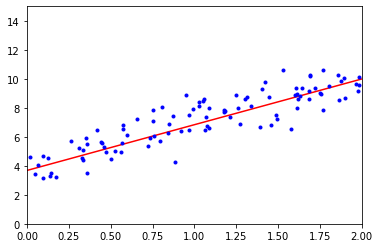

In [12]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<b> SVD </b>

$ \hat{\theta} = 
  X^+y
$

In [6]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

The above function computes $\hat{\theta} = X^+y$, where $X^+$ is the pseudoinverse of X, this can also be directly calculated using np.linalg.pinv function:

In [7]:
np.linalg.pinv(X_b).dot(y)

array([[3.84507151],
       [3.0899123 ]])

<h3><b> Gradient Descent </b></h3>

We can use NumPy methods to solve Gradient Descent algorithms.

<b> Batch Gradient Descent </b>

In [8]:
theta = np.random.randn(2,1)  # theta (initialized to random value)
eta = 0.1 # learning rate
iterations = 1000 # number of iterations

m = 100 # number of instances

for iteration in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[3.84507151]
 [3.0899123 ]]


<b> Stochastic Gradient Descent <b>

In [9]:
theta = np.random.randn(2,1)  # theta (initialized to random value)
t0, t1 = 5, 50  # learning schedule
n_epochs = 50 # number of iterations

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[3.85728663]
 [3.10124686]]


<h2 style="background-color:rgba(100,100,100,0.5);"> Linear Regression Programs - ML </h2>

<h3><b> Closed form </b></h3>

We can use Scikit-Learn methods to solve closed form solutions for linear regression.

<b> Normal Equation </b>

$ \hat{\theta} =
  (X^TX)^{-1}X^Ty
$

Given inputs for X and y, we need to solve for $\hat{\theta}$.

Scikit-Learn does not implement the Normal Equation method because it is computationally intensive and rather uses SVD because it is more performant for practical purposes.

<b> SVD </b>

$ \hat{\theta} = 
  X^+y
$

The above function computes $\hat{\theta} = X^+y$, where $X^+$ is the pseudoinverse of X

Scikit-Learn provides the LinearRegression class that implements SVD (under the hood it uses np.linalg.pinv function).

In [10]:
from sklearn.linear_model  import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_, lin_reg.coef_)

[3.84507151] [[3.0899123]]


The solution we have for $\hat{\theta_{0}}$ and $\hat{\theta_{1}}$ are close enough to the values of 4 and 3.

We can use this solution for $\hat{\theta}$ to predict new values:
$ \hat{y} = 
  X\hat{\theta}
$

In [11]:
y_predict = lin_reg.predict(X_new)

print(y_predict)

[[ 3.84507151]
 [10.02489611]]


We can plot a graph of the model's data and predictions:

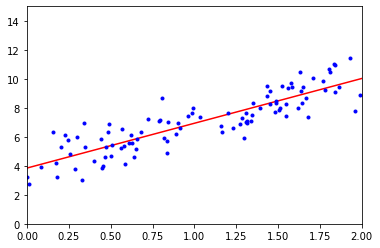

In [12]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<h3><b> Gradient Descent </b></h3>

We can use Scikit-Learn library to solve Gradient Descent algorithms.

<b> Batch Gradient Descent </b>

Scikit-Learn does not provide implementations for Batch Gradient or Mini-batch gradient descent. If you really need to perform linear regression with GD, you could do it easily in Keras or Tensorflow, assembling an LR model and using a batch size equal to the whole of your training samples.

<b> Stochastic Gradient Descent <b>

In [13]:
from sklearn.linear_model import SGDRegressor

eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)

sgd_reg = SGDRegressor(max_iter=n_epochs, tol=tol, penalty=None, eta0=eta)
sgd_reg.fit(X, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[3.81617481] [3.13597956]


In [14]:
y_predict = sgd_reg.predict(X_new)

print(y_predict)

[[ 3.84507151]
 [10.02489611]]


We can plot a graph of the model's data and predictions:

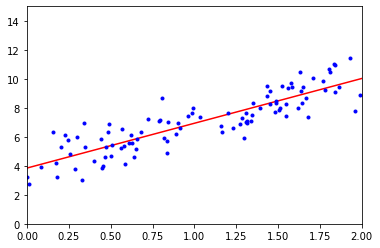

In [15]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()


<h2 style="background-color:rgba(100,100,100,0.5);"> Linear Regression Programs Implementation </h2>

<table style="width:100%">
  <thead>
    <tr>
      <th></th>
      <th colspan="1">Normal Equation</th>
      <th colspan="1">SVD</th>
      <th colspan="3">GD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td></td>
      <td></td>
      <td>Batch GD</td>
      <td>SGD</td>
      <td>Mini-batch GD</td>
    </tr>
    <tr>
      <td>Math (NumPy)</td>
      <td>Yes</td> 
      <td>Yes</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>Yes</td>
    </tr>
    <tr>
      <td>ML (Scikit-Learn)</td>
      <td>No</td> 
      <td>Yes (LinearRegression class)</td>
      <td>No</td> 
      <td>Yes (SGDRegressor class)</td>
      <td>No</td>
    </tr>
  </tbody>  
</table>

<h1> Polynomial Regression </h1>

Polynomial regression tries to find the parameters of a polynomial curve that best fits a set of data points. Note that you might know how that data points are related and still try to fit a polynomial regression curve. If the points are along a straight line, then you could still find a polynomial that fits, but the polynomial might overfit the data.

<h2 style="background-color:rgba(100,100,100,0.5);"> Polynomial Equation </h2>

A polynomial equation is of the form:

$ y = 
  \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + + \theta_{3}x_{1}x_{2} + ... + \theta_{4}x_{1}^2 + \theta_{5}x_{2}^2 + ....
$

This assumes a polynomial relationship between the dependent variable y and the regressors x. The number of regressors/parameters/dimensions is larger than in the linear case. Every polynomial is continous and smooth.

The graph of the zero polynomial is the x axis. The the graph of a 0 degree polynomial is a horizontal line with a y-intercept. The graph of 1 degree polynomial is a straight line.

The graph of a 2 degree polynomial is a parabola. The graph of a 3 degree polynomial is a cubic curve. Generally, the graph of any polynomial with degree 2 or higher is a non-linear curve.

Let us first consider the example of a linear one-dimensional data:
$ y = 
  \theta_{0} + \theta_{1}x_{1}
$

Now, let us try to fit a parabola instead of a line:

$ y = 
  (\theta_{0} + \theta_{1}x_{1})^2
$

The above can be simplied to be of the form:

$ y = 
  \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{1}^2
$

The values of $\theta$ in the above equation is not the same as in the previous equation but represents another constant so that the equation can be represented in this form.

If you visualize this in an Euclidean space, $x_{1}$ corresponds to the x coordinate, y value corresponds to the y coordinate. This can be represented by the equation of the form $y = \theta_{0} + \theta_{1}x^1 + \theta_{2}x^2$.

Next, let us consider the example of a linear two-dimensional data:

$ y = 
  \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2}
$

Now, let us try to fit a paraboloid instead of a plane:

$ y = 
  (\theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2})^2
$

The above can be simplied to be of the form:

$ y = 
  \theta_{0} + \theta_{1}x_{1} + \theta_{2}x_{2} + \theta_{3}x_{1}x_{2} + \theta_{4}x_{1}^2 + \theta_{5}x_{2}^2
$

Note that you now have more terms in the polynomial than the number of regressors/parameters (two in this case).

If you visualize this in an Euclidean space, $x_{1}$ corresponds to the x coordinate, $x_{2}$ corresponds to the y coordinate and y value corresponds to the z coordinate. This can be represented by the equation of the form $y = \theta_{0} + \theta_{1}x + \theta_{2}y + \theta_{3}xy + \theta_{4}x^2 + \theta_{5}y^2$.

This can be extended to a polynomial of degree n.

Details: https://en.wikipedia.org/wiki/Polynomial_regression

<b> Polynomial Expansion </b>

https://en.wikipedia.org/wiki/Multinomial_theorem
https://en.wikipedia.org/wiki/Polynomial_expansion

<b> Binomial Expansion </b>

The multinomial expansion is a general case of the binomial expansion. The binomial case has only two terms, with any power.

<b> Number of Parameters </b>

Polynomial function (degree=d) transforms a list of n parameters into a parameter list containing $\frac{(n + d)!}{d!n!}$ parameters, where n! is the factorial of n. Beware of the combinatorial explosion of the number of parameters.

Sticks and stars method:
https://en.wikipedia.org/wiki/Stars_and_bars_(combinatorics)
https://math.stackexchange.com/questions/2928712/number-of-elements-in-polynomial-of-degree-n-and-m-variables

<b> Matrix form </b>

The matrix form can also be used to represent the polynomial case (just like the linear case):
$ y = 
  X\theta 
$

<h2 style="background-color:rgba(100,100,100,0.5);"> Polynomial Regression Solutions - Closed Form </h2>

The polynomial regression can just be considered as a generalization of the linear regression - the polynomial case just has more parameters (n) because of combinatorial expansion, but otherwise the forms of the equation are the same.

Therefore, the same solutions as mentioned above in the section Linear Regression Solutions - Closed Form apply for polynomial regression also.

<h2 style="background-color:rgba(100,100,100,0.5);"> Polynomial Regression Solutions - Optimized Algorithms (Gradient Descent) </h2>

The polynomial regression can just be considered as a generalization of the linear regression - the polynomial case just has more parameters (n) because of combinatorial expansion, but otherwise the forms of the equation are the same.

Therefore, the same solutions as mentioned above in the section Linear Regression Solutions - Optimized Algorithms (Gradient Descent) apply for polynomial regression also.

<h2 style="background-color:rgba(100,100,100,0.5);"> Polynomial Regression Programs - NumPy </h2>

Let's first create some input data values:

$ y = 
  [\begin{matrix}
    y_{1} \\
    y_{2} \\
    \vdots \\
    y_{m} \\
  \end{matrix}]
$

$ X =
  [\begin{matrix}
    1 & x_{11} & \cdots & x_{1n} \\
    1 & x_{21} & \cdots & x_{2n} \\
    \vdots & \vdots &\ddots & \vdots \\
    1 & x_{m1} & \cdots & x_{mn} \\
  \end{matrix}]
$

The above matrix represents the parameters for degree d = 1. For a polynomial of degree (d), we will need all combinations of the parameters:

$ X\_poly =
  [\begin{matrix}
    1 & x_{11} & x_{11}x_{12} \cdots & x_{1n}^d \\
    1 & x_{21} & x_{11}x_{12} & \cdots & x_{2n}^d \\
    \vdots & \vdots &\ddots & \vdots \\
    1 & x_{m1} & x_{m1}x_{m2} & \cdots & x_{mn}^d \\
  \end{matrix}]
$

Given these, we will then need to solve for the parameters ($\hat{\theta}$).

In [26]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)

# X, X_poly, y are all matrices
# X, X_poly, y - values are row-ordered
# X is a (m x 1) array
# X_poly is a (m x 2) array
# X_poly[i] gets the instance at row i, X[i, j] gets the parameter in column j for instance in row i.
# y is also a (m x 1) array
# theta_0 = 2, theta_1 = 1, theta_2 = 0.5

# add x0 = 1 to each instance - the coefficent for \
X_b = np.c_[np.ones((m, 1)), X_poly]

print(X_b)
print(y)

[[ 1.00000000e+00  8.85751609e-01  7.84555912e-01]
 [ 1.00000000e+00  3.16899379e-01  1.00425216e-01]
 [ 1.00000000e+00 -3.09916477e-02  9.60482227e-04]
 [ 1.00000000e+00 -1.49202155e+00  2.22612831e+00]
 [ 1.00000000e+00 -2.17992942e+00  4.75209226e+00]
 [ 1.00000000e+00  3.74629012e-01  1.40346897e-01]
 [ 1.00000000e+00 -1.93070395e-01  3.72761776e-02]
 [ 1.00000000e+00  1.29289216e+00  1.67157013e+00]
 [ 1.00000000e+00 -2.11351992e+00  4.46696646e+00]
 [ 1.00000000e+00  2.31199155e+00  5.34530493e+00]
 [ 1.00000000e+00  9.50548160e-01  9.03541805e-01]
 [ 1.00000000e+00 -2.99875420e+00  8.99252678e+00]
 [ 1.00000000e+00 -1.06576350e+00  1.13585185e+00]
 [ 1.00000000e+00  1.55528958e+00  2.41892569e+00]
 [ 1.00000000e+00  1.78081242e+00  3.17129288e+00]
 [ 1.00000000e+00 -2.40751642e+00  5.79613533e+00]
 [ 1.00000000e+00 -2.27050071e-02  5.15517348e-04]
 [ 1.00000000e+00 -1.44390826e+00  2.08487108e+00]
 [ 1.00000000e+00  2.79130277e+00  7.79137113e+00]
 [ 1.00000000e+00  9.21976997e-

<h3><b> Closed form </b></h3>

We can use NumPy methods to solve for the closed form solutions using both the Normal Equation and SVD methods.

<b> Normal Equation </b>

$ \hat{\theta} =
  (X^TX)^{-1}X^Ty
$

Given the inputs for X and y, we need to solve for $\hat{\theta}$.

In [41]:
# linalg.inv computes inverse of matrix
# A.dot(B) computes AB (matrix multiplication, post-multiplication of B with A, not pre-multiplication)
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

print(theta_best)

[[1.91309444]
 [1.04472417]
 [0.50851373]]


The solutions we have for $\hat{\theta_{0}}$, $\hat{\theta_{1}}$ and $\hat{\theta_{2}}$ are close enough to the values of 2, 1 and 0.5.

We can use this solution for $\hat{\theta}$ to predict new values:
$ \hat{y} = 
  X\hat{\theta}
$

In [404]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.fit_transform(X_new)
X_new_b = np.c_[np.ones((100, 1)), X_new_poly] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)

We can plot a graph of the model's data and predictions:

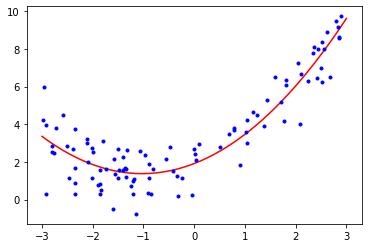

In [46]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.show()

<b> SVD </b>

$ \hat{\theta} = 
  X^+y
$

In [47]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)

The above function computes $\hat{\theta} = X^+y$, where $X^+$ is the pseudoinverse of X, this can also be directly calculated using np.linalg.pinv function:

In [48]:
np.linalg.pinv(X_b).dot(y)

array([[1.91309444],
       [1.04472417],
       [0.50851373]])

<h3><b> Gradient Descent </b></h3>

We can use NumPy methods to solve Gradient Descent algorithms.

<b> Batch Gradient Descent </b>

In [49]:
theta = np.random.randn(3,1)  # theta (initialized to random value)
eta = 0.01 # learning rate
iterations = 1000 # number of iterations

m = 100 # number of instances

for iteration in range(iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print(theta)

[[1.91116215]
 [1.04464101]
 [0.50886462]]


<b> Stochastic Gradient Descent <b>

In [54]:
theta = np.random.randn(3,1)  # theta (initialized to random value)
t0, t1 = .5, 5  # learning schedule
n_epochs = 50 # number of iterations

def learning_schedule(t):
    return t0 / (t + t1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[2.05597594]
 [1.04246769]
 [0.48580587]]


<h2 style="background-color:rgba(100,100,100,0.5);"> Polynomial Regression Programs - ML </h2>

<h3><b> Closed form </b></h3>

We can use Scikit-Learn methods to solve closed form solutions for polynomial regression.

<b> Normal Equation </b>

$ \hat{\theta} =
  (X^TX)^{-1}X^Ty
$

Given inputs for X and y, we need to solve for $\hat{\theta}$.

Scikit-Learn does not implement the Normal Equation method because it is computationally intensive and rather uses SVD because it is more performant for practical purposes.

<b> SVD </b>

$ \hat{\theta} = 
  X^+y
$

The above function computes $\hat{\theta} = X^+y$, where $X^+$ is the pseudoinverse of X

Scikit-Learn provides the LinearRegression class that implements SVD (under the hood it uses np.linalg.pinv function).

In [55]:
from sklearn.linear_model  import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[1.91309444] [[1.04472417 0.50851373]]


The solution we have for $\hat{\theta_{0}}$, $\hat{\theta_{1}}$ and $\hat{\theta_{2}}$ are close enough to the values of 2, 1 and 0.5.

We can use this solution for $\hat{\theta}$ to predict new values:
$ \hat{y} = 
  X\hat{\theta}
$

In [ ]:
y_predict = lin_reg.predict(X_new_poly)

print(y_predict)

We can plot a graph of the model's data and predictions:

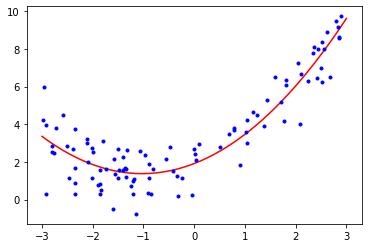

In [57]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.show()

<h3><b> Gradient Descent </b></h3>

We can use Scikit-Learn library to solve Gradient Descent algorithms.

<b> Batch Gradient Descent </b>

Scikit-Learn does not provide implementations for Batch Gradient or Mini-batch gradient descent. If you really need to perform polynomial regression with GD, you could do it easily in Keras or Tensorflow, assembling an LR model and using a batch size equal to the whole of your training samples.

<b> Stochastic Gradient Descent <b>

In [405]:
from sklearn.linear_model import SGDRegressor

eta = 0.01  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)

sgd_reg = SGDRegressor(max_iter=n_epochs, tol=tol, penalty=None, eta0=eta)
sgd_reg.fit(X_poly, y.ravel())

print(sgd_reg.intercept_, sgd_reg.coef_)

[1.72249086] [1.06516192 0.59641785]


In [ ]:
y_predict = sgd_reg.predict(X_new_poly)

print(y_predict)

We can plot a graph of the model's data and predictions:

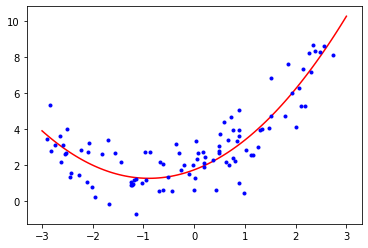

In [407]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

<h2 style="background-color:rgba(100,100,100,0.5);"> Polynomial Regression Programs Implementation </h2>

<table style="width:100%">
  <thead>
    <tr>
      <th></th>
      <th colspan="1">Normal Equation</th>
      <th colspan="1">SVD</th>
      <th colspan="3">GD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td></td>
      <td></td>
      <td>Batch GD</td>
      <td>SGD</td>
      <td>Mini-batch GD</td>
    </tr>
    <tr>
      <td>Math (NumPy)</td>
      <td>Yes</td> 
      <td>Yes</td>
      <td>Yes</td>
      <td>Yes</td>
      <td>Yes</td>
    </tr>
    <tr>
      <td>ML (Scikit-Learn)</td>
      <td>No</td> 
      <td>Yes (LinearRegression class with Polynomial features)</td>
      <td>No</td> 
      <td>Yes (SGDRegressor class with Polynomial features)</td>
      <td>No</td>
    </tr>
  </tbody>  
</table>

<h2 style="background-color:rgba(100,100,100,0.5);"> Linear Regression vs Polynomial Regression </h2>

Given any input for X, y without knowing the exact functional dependency between X and y, you can try either Linear or Polynomial regression to see how they fit.

<b>X and y has a linear relationship</b>

Linear regression might fit that data well, often times the linear regression solution will underfit. It is not possible for the linear regression to overfit the data.

Polynomial regression might fit/underfit/overfit the data, depending on the degree of the polynomial (regularization). The higher the degree of the chosen polynomial, it is likely to overfit the data. If you reduce the degree of the polynomial, then it might fit the data better, reducing the degree to one (like linear regression) might cause it to underfit the data.

<b>X and y has a polynomial relationship</b>

Linear regression will underfit the data because linear regression is the wrong model choice (the polnomial regression is the better model choice) - this makes sense because you cannot expect a line to fit data that has the form of a curve.

Polynomial regression might fit/underfit/overfit the data depending on the degree of the polynomial.

The following are example for the cases listed above.

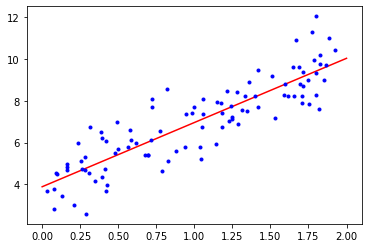

In [92]:
# linearly correlated data, linear regression
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = np.array([[0], [0.25], [1], [1.5], [2]])
y_predict = lin_reg.predict(X_new)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

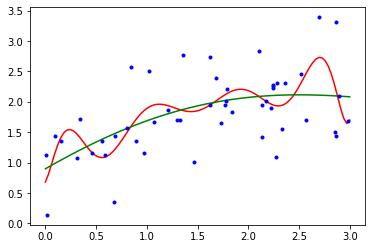

In [321]:
# linearly correlated data, polynomial regression
# the higher the degree of the polynomial, the more likely it will overfit the data
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

m = 50
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

poly_features = PolynomialFeatures(degree=10, include_bias=False)

poly_reg = Pipeline([
    ('poly_features', poly_features),
    ('regular_reg', LinearRegression())
])

poly_reg.fit(X, y)
X_new = np.linspace(0, 3, 100).reshape(100, 1)
y_predict = poly_reg.predict(X_new)
plt.plot(X_new, y_predict, "r")

poly_features = PolynomialFeatures(degree=4, include_bias=False)

poly_reg = Pipeline([
    ('poly_features', poly_features),
    ('regular_reg', LinearRegression())
])

poly_reg.fit(X, y)
X_new = np.linspace(0, 3, 100).reshape(100, 1)
y_predict = poly_reg.predict(X_new)
plt.plot(X_new, y_predict, "g")

# plot the data points
plt.plot(X, y, "b.")
plt.show()

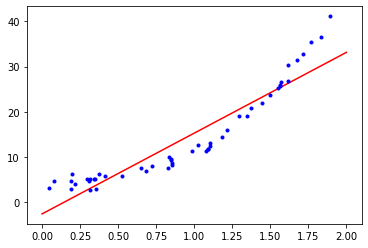

In [176]:
# polynomial data, linear regression
# the linear regression underfits the data
m = 50
X = 2 * np.random.rand(m, 1)
y = 4 + 2 * X + 5 * X**3 + np.random.randn(m, 1)

lin_reg = LinearRegression()
lin_reg.fit(X, y)

X_new = np.array([[0], [0.25], [1], [1.5], [2]])
y_predict = lin_reg.predict(X_new)

plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

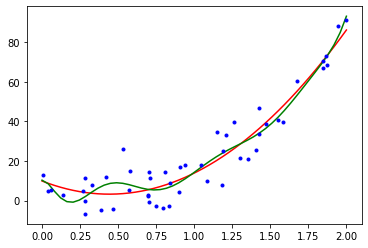

In [323]:
# polynomial data, polynomial regression

# polynomial of degree 4
m = 50
X = 2 * np.random.rand(m, 1)
y = 4 + 0.5 * X + 5 * X**2 + 3 * X**3 + 3 * X**4 + 7 * np.random.randn(m, 1)

# if we try to fit a polynomial of lesser degree, it underfits
poly_features = PolynomialFeatures(degree=2, include_bias=False)

poly_reg = Pipeline([
    ('poly_features', poly_features),
    ('regular_reg', LinearRegression())
])

poly_reg.fit(X, y)
X_new = np.linspace(0, 2, 50).reshape(50, 1)
y_predict = poly_reg.predict(X_new)
plt.plot(X_new, y_predict, "r")

# if we try to fit a polynomial of higher degree, it overfits
poly_features = PolynomialFeatures(degree=10, include_bias=False)

poly_reg = Pipeline([
    ('poly_features', poly_features),
    ('regular_reg', LinearRegression())
])

poly_reg.fit(X, y)
X_new = np.linspace(0, 2, 50).reshape(50, 1)
y_predict = poly_reg.predict(X_new)
plt.plot(X_new, y_predict, "g")

# plot data points
plt.plot(X, y, "b.")
plt.show()

<h2 style="background-color:rgba(100,100,100,0.5);"> Underfitting vs Overfitting </h2>

As seen from the examples above, if you increase the degree of the Polynomial Regression, it will more likely fit the training data much better. A very high degree polynomial model wiggles around to get as close as possible to the training instances, meaning it overfits the data.

The model that will generalize best is the one that fits the data well (without underfitting or overfitting). For example, if the data actually represents a quadratic equation, the model that will generalize best is the quadratic model, which makes sense because the data was generated using a quadratic model. But in general you won’t know what function generated the data, so how can you decide how complex your model should be? How can you tell that your model is overfitting or underfitting the data?

We can use cross-validation to get an estimate of a model’s generalization performance. If a model performs well on the training data but generalizes poorly according to the cross-validation metrics, then your model is overfitting. If it performs poorly on both, then it is underfitting. This is one way to tell when a model is too simple or too complex.

Another way to tell is to look at the learning curves.

<h3> <b> Learning Curves </b> </h3>

These are plots of the model’s performance on the training set and the validation set as a function of the training set size (or the training iteration). To generate the plots, train the model several times on different sized subsets of the training set. The following code defines a function that, given some training data, plots the learning curves of a model:

In [233]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

<h3><b> Learning Curves - Underfitting Model </b></h3>

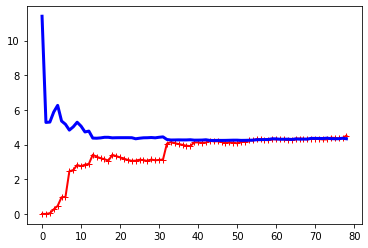

In [324]:
# Learning Curve - underfitting model
# polynomial data, linear regression
# the linear regression underfits the data

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 2 * X + 5 * X**3 + np.random.randn(m, 1)

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

Performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, both because the data is noisy and because it is not linear at all. So the error on the training data goes up until it reaches a plateau, at which point adding new instances to the training set doesn’t make the average error much better or worse. 

Performance of the model on the validation data: when the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down. However, once again a straight line cannot do a good job modeling the data, so the error ends up at a plateau, very close to the other curve. Adding more instances will not reduce the error if the model is underfitting.

These learning curves are typical of a model that’s underfitting. Both curves have reached a plateau; they are close and fairly high.

<h3><b> Learning Curves - Overfitting Model </b></h3>

(0.0, 100.0, 0.0, 2.5)

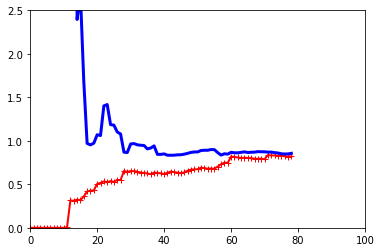

In [327]:
# Learning Curve - overfitting model
# polynomial data
# polynomial of higher degree, overfits the data
poly_features = PolynomialFeatures(degree=10, include_bias=False)

poly_reg = Pipeline([
    ('poly_features', poly_features),
    ('regular_reg', LinearRegression())
])

plot_learning_curves(poly_reg, X, y)
plt.axis([0, 100, 0, 2.5])

Performance on the training data: when there are just one or two instances in the training set, the model can fit them perfectly, which is why the curve starts at zero. But as new instances are added to the training set, it becomes impossible for the model to fit the training data perfectly, even though it does overfit. Therefore, the error does go up but not much (because it overfits), until it reaches a plateau. 

Performance of the model on the validation data: when the model is trained on very few training instances, it is incapable of generalizing properly, which is why the validation error is initially quite big. Then, as the model is shown more training examples, it learns, and thus the validation error slowly goes down.

These learning curves look a bit like the underfitting case, but there are two very important differences:

The error on the training data is much lower than with the Linear Regression model.

There is a gap between the curves. This means that the model performs significantly better on the training data than on the validation data, which is the hallmark of an overfitting model. If you used a much larger training set, however, the two curves would continue to get closer.

<h3><b> Bias Variance Tradeoff </b></h3>

An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different errors:

<b> Bias </b>

This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most likely to underfit the training data.

<b> Variance </b>

This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance and thus overfit the training data.

<b> Irreducible error </b>

This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance. This is why it is called a trade-off.

<h2 style="background-color:rgba(100,100,100,0.5);"> Regularization of Models </h2>

A good way to reduce overfitting is to regularize the model (i.e., to constrain it): the fewer degrees of freedom it has, the harder it will be for it to overfit the data. A simple way to regularize a polynomial model is to reduce the number of polynomial degrees.

Regularization is also typically achieved by constraining the weights of the model. This is similar to keeping the degree of the polynomial but adjusting the coefficients (weights) so the effect of terms can be reduced so as to control how the polynomial fits the data.

Ridge Regression, Lasso Regression, and Elastic Net, are different ways to constrain the weights.

Regularization involves adding a regularization term α to the cost function. This forces the learning algorithm to not only fit the data but also keep the model weights as small as possible. The regularization term depends on the type of regularization used.

The hyperparameter α controls how much you want to regularize the model. If α = 0, then there is no regularization. If α is increased, this increases the regularization. If α is very large, then all weights end up very close to zero and the result is a flat line going through the data’s mean.

<h3><b> Ridge Regression </b></h3>

$ J(X, \theta, y) = 
  MSE(X, \theta, y) + \alpha\cfrac{1}{2}\sum_{i=1}^{n}\theta_{i}^2
$

Note that the bias term $\theta_{0}$ is not regularized (sum starts at i = 1, not 0).

If we define w as the vector of feature weights (θ1 to θn), then the regularization term is equal to $\cfrac{1}{2}({\parallel}w{\parallel}_2^2)$, where ${\parallel}w{\parallel}_2$ represents the $ℓ_2$ norm of the weight vector.

As with linear/polynomial regression, we can perform Ridge Regression either by computing a closed-form equation or by performing Gradient Descent. The pros and cons are the same.

<b> Closed Form </b>

$ \hat{\theta} =
  (X^TX + {\alpha}A)^{-1}X^Ty
$

A is the (n + 1) × (n + 1) identity matrix with a 0 in the top-left cell (corresponding to the bias term)

<b> Gradient Descent </b>

For Gradient Descent, just add ${\alpha}w$ to the MSE gradient vector.

$ g(\theta, J) = \nabla_{\theta}MSE(\theta) + {\alpha}w =
  [\begin{matrix}
    \frac{\partial}{{\partial}\theta_{0}}MSE(\theta) \\
    \frac{\partial}{{\partial}\theta_{1}}MSE(\theta) \\
    \vdots \\
    \frac{\partial}{{\partial}\theta_{2}}MSE(\theta) \\
  \end{matrix}] + {\alpha}w = 
  \frac{2}{m}X^T(X\theta - y) + {\alpha}w
$

<h3><b> Lasso Regression </b></h3>

$ J(X, \theta, y) = 
  MSE(X, \theta, y) + \alpha\sum_{i=1}^{n}|\theta_{i}|
$

Note that the bias term $\theta_{0}$ is not regularized (sum starts at i = 1, not 0).

If we define w as the vector of feature weights (θ1 to θn), then the regularization term is equal to ${\parallel}w{\parallel}_1$, where ${\parallel}w{\parallel}_1$ represents the $ℓ_1$ norm of the weight vector.

An important characteristic of Lasso Regression is that it tends to eliminate the weights of the least important features (i.e., set them to zero).

The Lasso cost function is not differentiable at $\theta_{i} = \theta$ (for i = 1, 2, ⋯, n), but Gradient Descent still works fine if you use a subgradient vector g instead when any θi = 0.

$ g(\theta, J) = 
  \nabla_{\theta}MSE(\theta) + 
  [\begin{matrix}
    sign(\theta_{1} \\
    sign(\theta_{2} \\
    \vdots \\
    sign(\theta_{n} \\
  \end{matrix}] =
  [\begin{matrix}
    \frac{\partial}{{\partial}\theta_{0}}MSE(\theta) \\
    \frac{\partial}{{\partial}\theta_{1}}MSE(\theta) \\
    \vdots \\
    \frac{\partial}{{\partial}\theta_{2}}MSE(\theta) \\
  \end{matrix}] +
  [\begin{matrix}
    sign(\theta_{1}) \\
    sign(\theta_{2}) \\
    \vdots \\
    sign(\theta_{n}) \\
  \end{matrix}] = 
  \frac{2}{m}X^T(X\theta - y) +
  [\begin{matrix}
    sign(\theta_{1}) \\
    sign(\theta_{2}) \\
    \vdots \\
    sign(\theta_{n}) \\
  \end{matrix}]
$

$where \quad sign(\theta_{i}) = 
  \begin{cases}
    -1 & \quad {\theta_{i} < 0} \\
    0 & \quad {\theta_{i} = 0} \\
    1 & \quad {\theta_{i} > 0} \\
  \end{cases}
$

<h3><b> Elastic Net </b></h3>

Elastic Net is a middle ground between Ridge Regression and Lasso Regression. The regularization term is a simple mix of both Ridge and Lasso’s regularization terms, and you can control the mix ratio r. When r = 0, Elastic Net is equivalent to Ridge Regression, and when r = 1, it is equivalent to Lasso Regression.

$ J(X, \theta, y) = 
  MSE(X, \theta, y) + r\alpha\sum_{i=1}^{n}|\theta_{i}| + \cfrac{1-r}{2}\alpha\sum_{i=1}^{n}\theta_{i}^2
$

So when should you use plain Linear Regression (i.e., without any regularization), Ridge, Lasso, or Elastic Net? It is almost always preferable to have at least a little bit of regularization, so generally you should avoid plain Linear Regression. Ridge is a good default, but if you suspect that only a few features are useful, you should prefer Lasso or Elastic Net because they tend to reduce the useless features’ weights down to zero, as we have discussed.

In general, Elastic Net is preferred over Lasso because Lasso may behave erratically when the number of features is greater than the number of training instances or when several features are strongly correlated.

<h2 style="background-color:rgba(100,100,100,0.5);"> Linear Regression - Regularization </h2>

<h3><b> Ridge Regression </b></h3>

<b> Closed form </b>

$ \hat{\theta} =
  (X^TX + {\alpha}A)^{-1}X^Ty
$

We can use Scikit-Learn methods to solve closed form solutions for regularization (using a matrix factorization technique (cholesky) for the above equation).

In [333]:
from sklearn.linear_model  import Ridge

m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)

X_new = [[0], [.5], [1], [1.5], [2]]
y_predict = ridge_reg.predict(X_new)

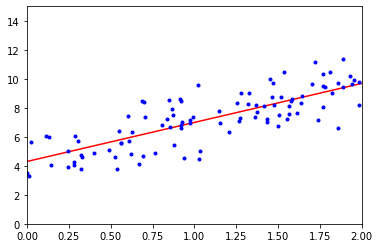

In [334]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<b> Gradient Descent </b>

We can use Scikit-Learn library to solve Gradient Descent regularization algorithms.

In [355]:
from sklearn.linear_model import SGDRegressor

# hyperparameters
eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)
penalty="l2" # regularization type (l2 - ridge)
alpha = 0.01 # alpha regularization coefficient

sgd_reg = SGDRegressor(max_iter=n_epochs, tol=tol, eta0=eta, penalty=penalty, alpha=alpha)
sgd_reg.fit(X, y.ravel())

y_predict = sgd_reg.predict(X_new)

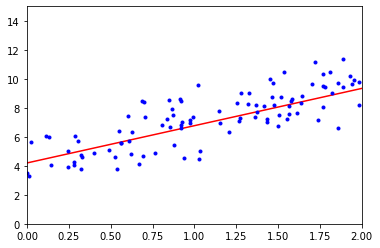

In [356]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<h3><b> Lasso Regression </b></h3>

<b> Closed form </b>

We can use Scikit-Learn methods to solve closed form solutions for regularization.

In [353]:
from sklearn.linear_model  import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)

y_predict = lasso_reg.predict(X_new)

We can plot a graph of the model's data and predictions:

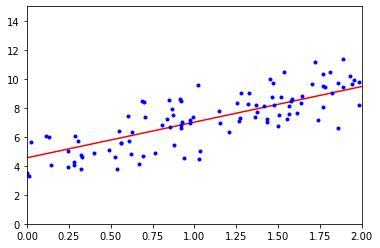

In [354]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<b> Gradient Descent </b>

We can use Scikit-Learn library to solve Gradient Descent regularization algorithms.

In [357]:
from sklearn.linear_model import SGDRegressor

# hyperparameters
eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)
penalty="l1" # regularization type (l1 - lasso)
alpha = 0.01 # alpha regularization coefficient

sgd_reg = SGDRegressor(max_iter=n_epochs, tol=tol, eta0=eta, penalty=penalty, alpha=alpha)
sgd_reg.fit(X, y.ravel())

y_predict = sgd_reg.predict(X_new)

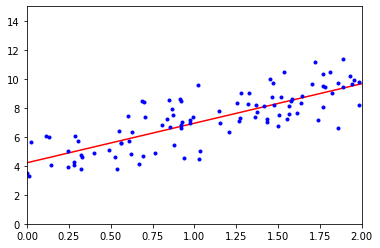

In [358]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<h3><b> Elastic Net Regression </b></h3>

<b> Closed form </b>

We can use Scikit-Learn methods to solve closed form solutions for regularization.

In [359]:
from sklearn.linear_model  import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)

y_predict = elastic_net.predict(X_new)

We can plot a graph of the model's data and predictions:

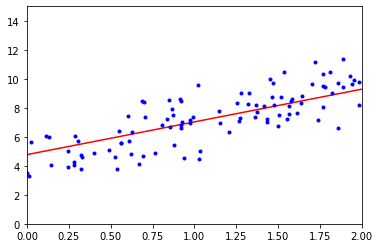

In [360]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<b> Gradient Descent </b>

We can use Scikit-Learn library to solve Gradient Descent regularization algorithms.

In [361]:
from sklearn.linear_model import SGDRegressor

# hyperparameters
eta = 0.1  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)
penalty="elasticnet" # regularization type (elasticnet - Elastic Net)
l1_ratio = 0.5 # l1 ratio
alpha = 0.01 # alpha regularization coefficient

sgd_reg = SGDRegressor(max_iter=n_epochs, tol=tol, eta0=eta,
                        penalty=penalty, l1_ratio=l1_ratio, alpha=alpha)
sgd_reg.fit(X, y.ravel())

y_predict = sgd_reg.predict(X_new)

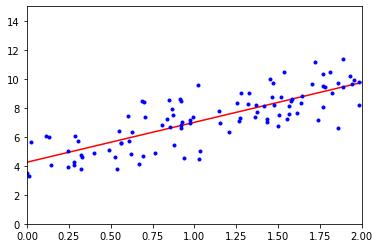

In [362]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

<h2 style="background-color:rgba(100,100,100,0.5);"> Polynomial Regression - Regularization </h2>

<h3><b> Ridge Regression </b></h3>

<b> Closed form </b>

$ \hat{\theta} =
  (X^TX + {\alpha}A)^{-1}X^Ty
$

We can use Scikit-Learn methods to solve closed form solutions for regularization (using a matrix factorization technique (cholesky) for the above equation).

In [509]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + X**3 + np.random.randn(m, 1)

poly_features = PolynomialFeatures(degree=10, include_bias=False)

poly_reg = Pipeline([
    ('poly_features', poly_features),
    ('ridge_reg', Ridge(alpha=0.01, solver="cholesky"))
])

poly_reg.fit(X, y)
X_new = np.linspace(-3, 3, 50).reshape(50, 1)
y_predict = poly_reg.predict(X_new)

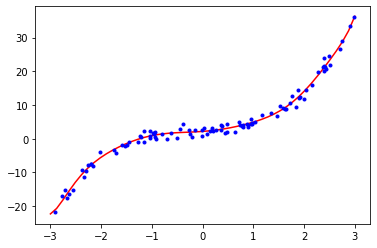

In [510]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.show()

<b> Gradient Descent </b>

We can use Scikit-Learn library to solve Gradient Descent regularization algorithms.

In [554]:
# hyperparameters
eta = 0.01  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)
penalty="l2" # regularization type (l2 - ridge)
alpha = 0.05 # alpha regularization coefficient

poly_features = PolynomialFeatures(degree=3, include_bias=False)

poly_sgd_reg = Pipeline([
    ('poly_features', poly_features),
    ('sgd_reg', SGDRegressor(max_iter=n_epochs, tol=tol, eta0=eta, penalty=penalty, alpha=alpha))
])

poly_sgd_reg.fit(X, y.ravel())

y_predict = poly_sgd_reg.predict(X_new)

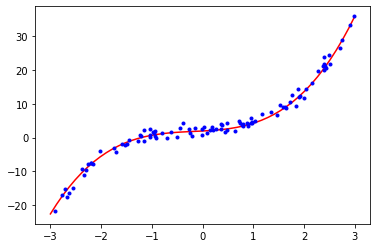

In [555]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.show()

<h3><b> Lasso Regression </b></h3>

<b> Closed form </b>

We can use Scikit-Learn methods to solve closed form solutions for regularization.

In [547]:
from sklearn.linear_model  import Lasso

poly_features = PolynomialFeatures(degree=6, include_bias=False)

poly_reg = Pipeline([
    ('poly_features', poly_features),
    ('lasso_reg', Lasso(alpha=0.01))
])

poly_reg.fit(X, y)
y_predict = poly_reg.predict(X_new)

We can plot a graph of the model's data and predictions:

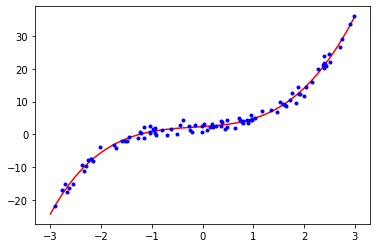

In [548]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.show()

<b> Gradient Descent </b>

We can use Scikit-Learn library to solve Gradient Descent regularization algorithms.

In [575]:
# hyperparameters
eta = 0.01  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)
penalty="l1" # regularization type (l2 - ridge)
alpha = 0.05 # alpha regularization coefficient

poly_features = PolynomialFeatures(degree=3, include_bias=False)

poly_sgd_reg = Pipeline([
    ('poly_features', poly_features),
    ('sgd_reg', SGDRegressor(max_iter=n_epochs, tol=tol, eta0=eta, penalty=penalty, alpha=alpha))
])

poly_sgd_reg.fit(X, y.ravel())

y_predict = poly_sgd_reg.predict(X_new)

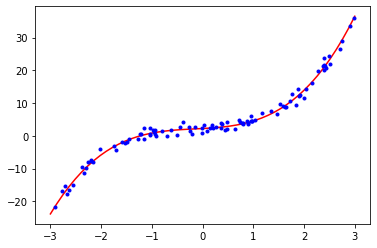

In [576]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.show()

<h3><b> Elastic Net Regression </b></h3>

<b> Closed form </b>

We can use Scikit-Learn methods to solve closed form solutions for regularization.

In [549]:
poly_features = PolynomialFeatures(degree=6, include_bias=False)

poly_reg = Pipeline([
    ('poly_features', poly_features),
    ('elastic_net_reg', ElasticNet(alpha=0.1, l1_ratio=0.5))
])

poly_reg.fit(X, y)
y_predict = poly_reg.predict(X_new)

y_predict = poly_reg.predict(X_new)

We can plot a graph of the model's data and predictions:

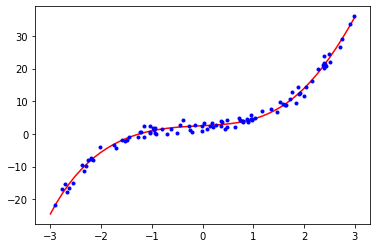

In [551]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.show()

<b> Gradient Descent </b>

We can use Scikit-Learn library to solve Gradient Descent regularization algorithms.

In [584]:
from sklearn.linear_model import SGDRegressor

# hyperparameters
eta = 0.01  # learning rate, for learning schedule, let's use the default ('constant')
n_epochs = 1000 # number of iterations
tol = 1e-3 # epsilon (tolerance)
penalty="elasticnet" # regularization type (elasticnet - Elastic Net)
l1_ratio = 0.5 # l1 ratio
alpha = 0.05 # alpha regularization coefficient

poly_features = PolynomialFeatures(degree=3, include_bias=False)

poly_sgd_reg = Pipeline([
    ('poly_features', poly_features),
    ('sgd_reg', SGDRegressor(max_iter=n_epochs, tol=tol, eta0=eta,
                                penalty=penalty, l1_ratio=l1_ratio, alpha=alpha))
])

poly_sgd_reg.fit(X, y.ravel())

y_predict = poly_sgd_reg.predict(X_new)

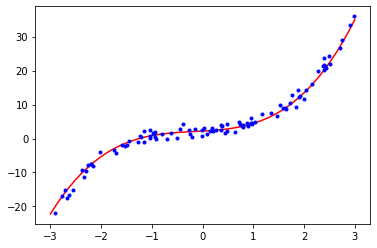

In [585]:
plt.plot(X_new, y_predict, "r")
plt.plot(X, y, "b.")
plt.show()

<h2 style="background-color:rgba(100,100,100,0.5);"> Regularization Regression Programs Implementation </h2>

<table style="width:100%">
  <thead>
    <tr>
      <th></th>
      <th colspan="3">Normal Equation</th>
      <th colspan="3">GD</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td></td>
      <td>Ridge</td>
      <td>Lasso</td>
      <td>Elastic Net</td>
      <td>Ridge</td>
      <td>Lasso</td>
      <td>Elastic Net</td>
    </tr>
    <tr>
      <td>Linear Regression (Scikit-Learn)</td>
      <td>Yes (Ridge)</td> 
      <td>Yes (Lasso)</td>
      <td>Yes (ElasticNet)</td>
      <td>Yes (SGDRegressor with alpha=l2)</td> 
      <td>Yes (SGDRegressor with alpha=l1)</td>
      <td>Yes (SGDRegressor with alpha=elasticnet)</td>
    </tr>
    <tr>
      <td>Polynomial Regression (Scikit-Learn)</td>
      <td>Yes (Ridge with Polynomial features)</td> 
      <td>Yes (Lasso with Polynomial features)</td>
      <td>Yes (ElasticNet with Polynomial features)</td>
      <td>Yes (SGDRegressor with alpha=l2 and Polynomial features)</td> 
      <td>Yes (SGDRegressor with alpha=l1 and Polynomial features)</td>
      <td>Yes (SGDRegressor with alpha=elasticnet and Polynomial features)</td>
    </tr>
  </tbody>  
</table>

<h2 style="background-color:rgba(100,100,100,0.5);"> Logistic Regression </h2>

Some regression algorithms can be used for classification (and vice versa). Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class. If the estimated probability is greater than 50%, then the model predicts that the instance belongs to that class (called the positive class, labeled “1”), and otherwise it predicts that it does not (i.e., it belongs to the negative class, labeled “0”).

This makes the Logistic regression a binary classifier.

<h3><b>Prediction</b></h3>

Just like a Linear Regression model, a Logistic Regression model computes a weighted sum of the input features (plus a bias term), but instead of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result. The logistic is a sigmoid function (S-shaped) that outputs a number between 0 and 1. Therefore, you first take the output of the linear regression function, then use the sigmoid function to get the probability. Based on the value of the probability value, the class can be predicted.

$ \hat{p} =
  h_\theta(x) = \sigma(\theta^Tx)
$

$ \sigma(t) =
  \frac{1}{1 + Exp(-t)}
$

$ \hat{y} = 
  \begin{cases}
    0 & \quad {\hat{p} < 0.5} \\
    1 & \quad {\hat{p} >= 0.5} \\
  \end{cases}
$

First $\theta^Tx$ is computed, then $\hat{p}$, finally $\hat{y}$. If, $\theta^Tx$ is positive, the model predicts 1, if $\theta^Tx$ is negative, the model predicts 0.

<h3><b>Cost Function</b></h3>

$ J(X, \theta, y) = 
  -\cfrac{1}{m}\sum_{i=1}^{m}[y^ilog(\hat{p}^i) + (1-y^i)log(1 - \hat{p}^i)]
$

This cost function makes sense because $–log(t)$ grows very large when t approaches 0, so the cost will be large if the model estimates a probability close to 0 for a positive instance, and it will also be very large if the model estimates a probability close to 1 for a negative instance. On the other hand, $–log(t)$ is close to 0 when t is close to 1, so the cost will be close to 0 if the estimated probability is close to 0 for a negative instance or close to 1 for a positive instance, which is precisely what we want.

The cost function over the whole training set is the average cost over all training instances and is called the log loss function.

There is no known closed-form equation to compute the value of θ that minimizes this cost function (there is no equivalent of the Normal Equation). The good news is that this cost function is convex, so Gradient Descent (or any other optimization algorithm) can be used. The partial derivatives of the cost function with regard to the jth model parameter $\theta_j$ are given by

$ \frac{\partial}{{\partial}\theta_{j}}J(\theta) =
  \cfrac{1}{m}\sum_{i=1}^{m}(\sigma(\theta^Tx^i) - y^i)x_j^i
$

Then, any of the know Gradient Descent algorithms can be used to solve for the model parameters.

<h2 style="background-color:rgba(100,100,100,0.5);"> Softmax Regression </h2>

The Logistic Regression model can be generalized to support multiple classes directly, without having to train and combine multiple binary classifiers. This is called Softmax Regression, or Multinomial Logistic Regression.

This makes the Softmax regression a multiclass classifier. Also, the Softmax Regression classifier predicts only one class at a time (i.e., it is multiclass, not multioutput), so it should be used only with mutually exclusive classes, such as different types of flowers. You cannot use it to recognize multiple people in one picture.

<h3><b>Prediction</b></h3>

When given an instance x, the Softmax Regression model first computes a score $s_k(x)$ for each class k, then estimates the probability of each class by applying the softmax function (also called the normalized exponential) to the scores. The equation to compute $s_k(x)$ should look familiar, as it is just like the equation for Linear Regression prediction.

Softmax score:

$ S_k(x) =
  (\theta^k)^Tx
$

Note that each class has its own dedicated parameter vector $\theta^k$, all these vectors are typically stores as rows in a parameter matrix $\Theta$.

Once you have computed the score of every class for the instance x, you can estimate the probability $\hat{p}_k$ that the instance belongs to class k by running the scores through the softmax function. The function computes the exponential of every score, then normalizes them (dividing by the sum of all the exponentials). The scores are generally called logits or log-odds (although they are actually unnormalized log-odds).

Softmax function:

$ \hat{p}_k =
  \sigma(s(x))_k = 
  \cfrac{exp(s_k(x))}{\sum_{j=1}^{k}exp(s_j(x))}
$
K is the number of classes, s(x) is a vector containing the scores of each class for instance x, $\sigma(s(x))_k$ is the estimated probability that the instance x belongs to class k, given the scores of each class for that instance.

Just like the Logistic Regression classifier, the Softmax Regression classifier predicts the class with the highest estimated probability (which is simply the class with the highest score).

Softmax regression classifier prediction:

$ \hat{y} =
  Arg_kMax \: \sigma(s(x))_k = 
  Arg_kMax \: s_k(x) = 
  Arg_kMax \: ((\theta^k)^Tx)
$

The argmax operator returns the value of a variable that maximizes a function. In this equation, it returns the value of k that maximizes the estimated probability $\sigma(s(x))_k$.

<h3><b>Cost Function</b></h3>

The objective is to have a model that estimates a high probability for the target class (and consequently a low probability for the other classes). Minimizing the cost function shown below, called the cross entropy, should lead to this objective because it penalizes the model when it estimates a low probability for a target class. Cross entropy is frequently used to measure how well a set of estimated class probabilities matches the target classes.

Cross entropy cost function:

$ J(\Theta) = 
  -\cfrac{1}{m}\sum_{i=1}^{m}\sum_{k=1}^{k}y^i_k\:log(\hat{p}^i_k)
$
$y^i_k$ is the target probability that the ith instance belongs to class k. In general, it is either equal to 1 or 0, depending on whether the instance belongs to the class or not.

Notice that when there are just two classes (K=2), this cost function is equivalent to the Logistic Regression’s cost function (log loss).

Cross entropy gradient vector for class k

$ g(J(\Theta)) = \nabla_{\theta^k}J(\Theta) =
  \cfrac{1}{M}\sum_{i=1}^{m}(\hat{p}^i_k - y^i_k)x^i
$

Now you can compute the gradient vector for every class, then use Gradient Descent (or any other optimization algorithm) to find the parameter matrix $\Theta$ that minimizes the cost function.